**A. IMPORT LIBRARY**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab.patches import cv2_imshow

**B. IMPORT PICTURE**

In [3]:
!git clone https://github.com/nhantruongcse/Digital_Imagine_Processing_and_Computer_Vision.git

Cloning into 'Digital_Imagine_Processing_and_Computer_Vision'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 2.00 MiB | 3.95 MiB/s, done.


In [4]:
!cp '/content/Digital_Imagine_Processing_and_Computer_Vision/Sample_Pictures/pic03.jpg' '/content/pic03.jpg'
img = cv2.imread("pic03.jpg")

In [39]:
img.shape

(892, 736, 3)

In [5]:
height,width = len(img),len(img[0])
height,width

(892, 736)

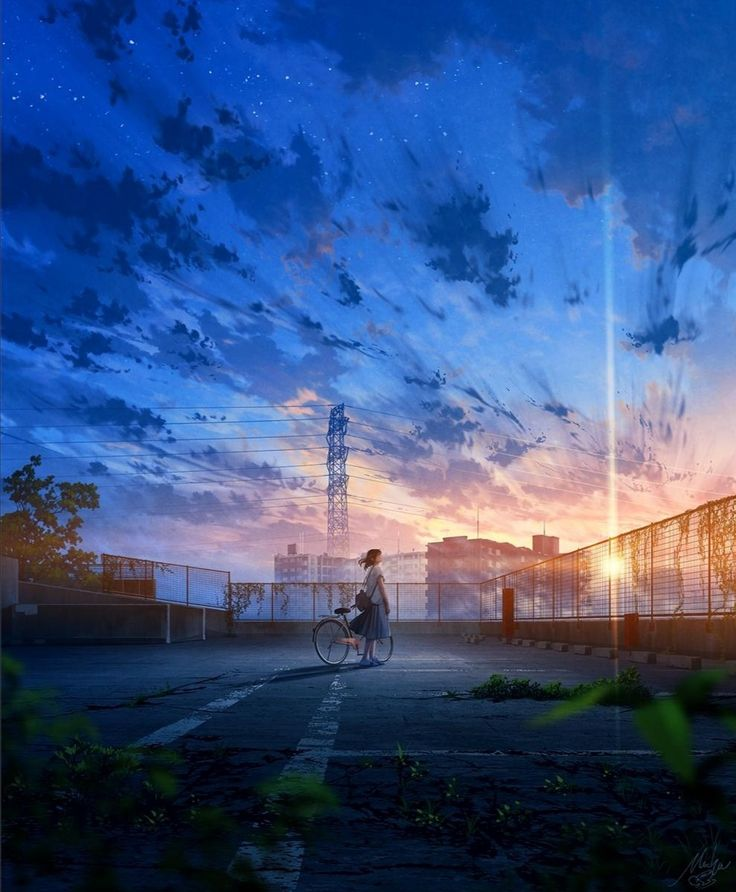

In [6]:
cv2_imshow(img)

In [7]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

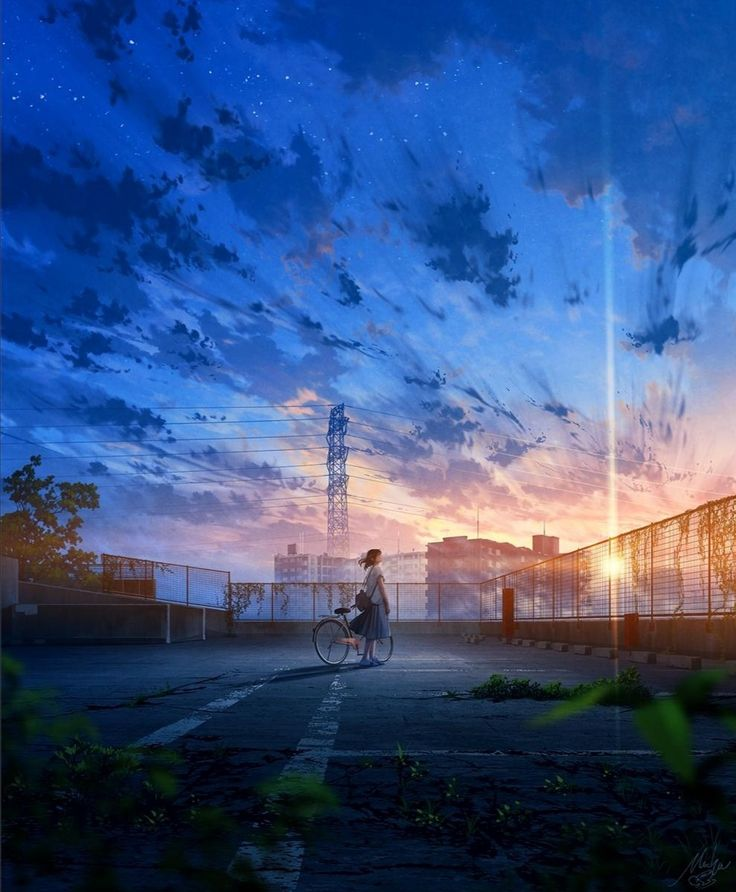

In [8]:
cv2_imshow(img)

# **C. GRAYSCALE**


**C1. USING SCALE 1/3 R -1/3 G -1/3 B**

In [42]:
# initial value and array
img_grayscale_C1 = [[0]*width for i in range(height)]

In [44]:
# calculate value of gray cell:
for i in range(height):
  for j in range(width):
    img_grayscale_C1[i][j] = int((img[i][j][0]+img[i][j][1]+img[i][j][2])/3)

# convert to numpy array
img_grayscale_C1 = np.array(img_grayscale_C1)
img_grayscale_C1.shape

<ipython-input-44-3da838f5d30f>:4: RuntimeWarning: overflow encountered in scalar add
  img_grayscale_C1[i][j] = int((img[i][j][0]+img[i][j][1]+img[i][j][2])/3)


(892, 736)

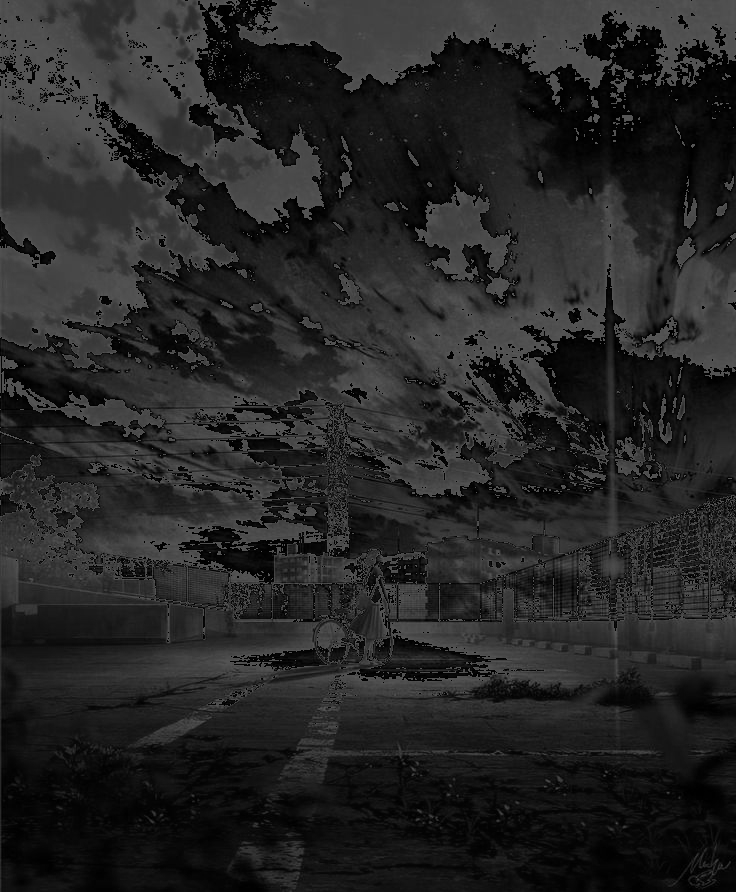

True

In [11]:
# show grayscale_C1:
cv2_imshow(img_grayscale_C1)
cv2.imwrite("/content/pic_gray_C1.jpg",img_grayscale_C1)

**C2. USING SCALE 0.2126 R -0.7152 G - 0.0722 B**

In [12]:
# initial value and array
img_grayscale_C2 = [[0]*width for i in range(height)]

In [45]:
# calculate value of gray cell:
for i in range(height):
  for j in range(width):
    img_grayscale_C2[i][j] = min(int(img[i][j][0]*0.2126+img[i][j][1]*0.7152+img[i][j][2]*0.0722),255)

# convert to numpy array
img_grayscale_C2 = np.array(img_grayscale_C2)
img_grayscale_C1.shape

(892, 736)

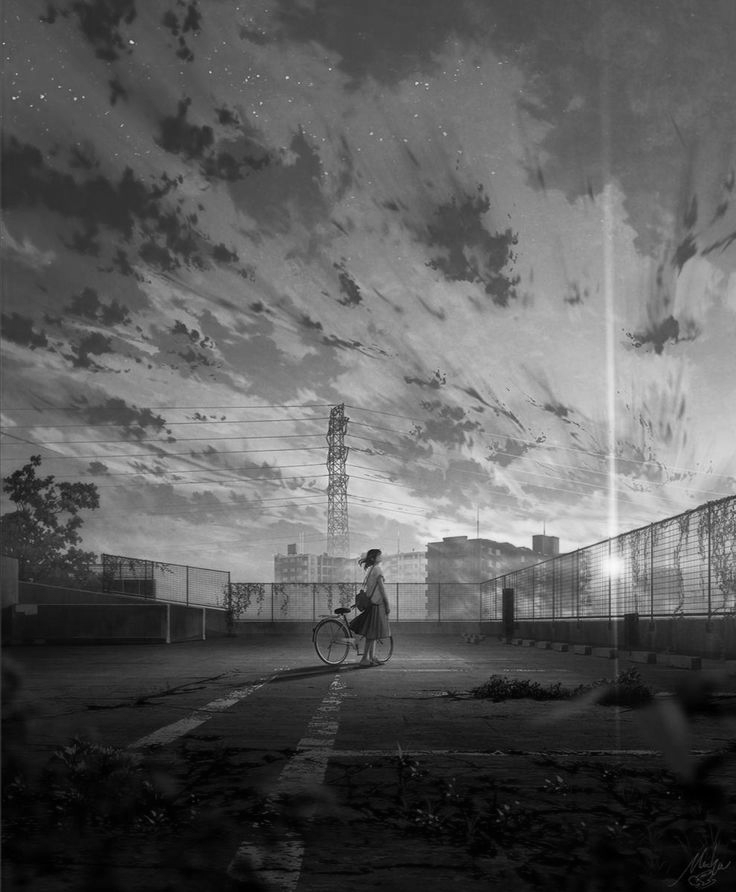

True

In [14]:
# show grayscale_C1:
cv2_imshow(img_grayscale_C2)
cv2.imwrite("/content/pic_gray_C2.jpg",img_grayscale_C2)

**C3. USING SCALE 0.299 R -0.587 G -0.114 B**

In [15]:
# initial value and array
img_grayscale_C3 = [[0]*width for i in range(height)]

In [50]:
# calculate value of gray cell:
for i in range(height):
  for j in range(width):
    img_grayscale_C3[i][j] = min(int(img[i][j][0]*0.299+img[i][j][1]*0.587+img[i][j][2]*0.114),255)

# convert to numpy array
img_grayscale_C3 = np.array(img_grayscale_C3)
img_grayscale_C1.shape

(892, 736)

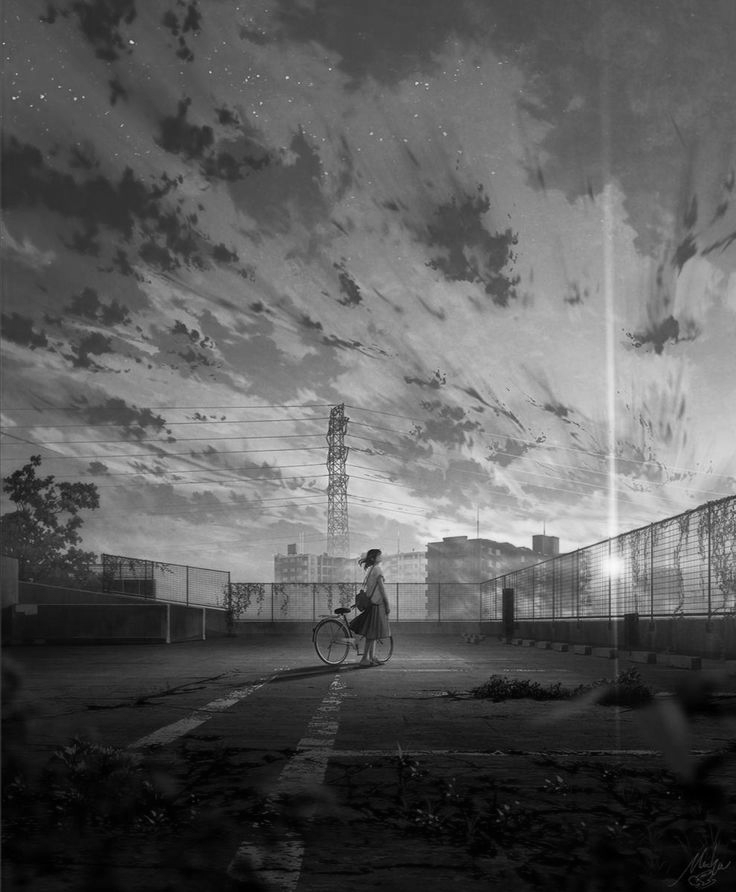

True

In [17]:
# show grayscale_C1:
cv2_imshow(img_grayscale_C2)
cv2.imwrite("/content/pic_gray_C3.jpg",img_grayscale_C3)

**SO SÁNH VÀ NHẬN XÉT:**

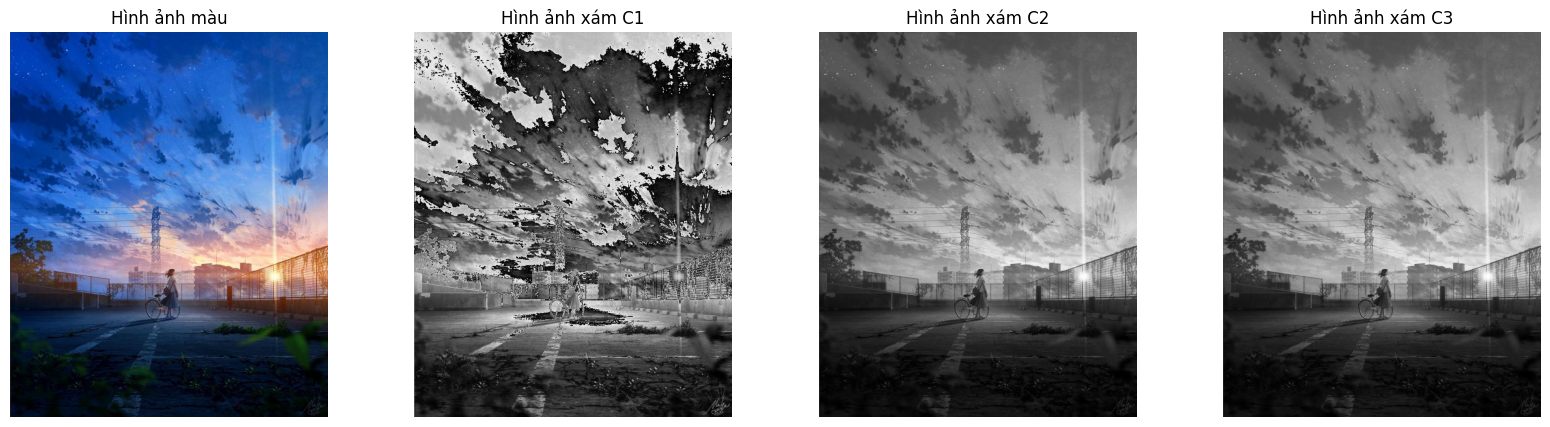

In [30]:
title_pic = ["Hình ảnh màu","Hình ảnh xám C1","Hình ảnh xám C2","Hình ảnh xám C3"]
name_pic = ["pic03.jpg","pic_gray_C1.jpg","pic_gray_C2.jpg","pic_gray_C3.jpg"]
plt.figure(figsize=(20,5))
for i in range(4):
  plt.subplot(1, 4, i+1)
  if i>0:
    plt.imshow(plt.imread(name_pic[i]),cmap='gray')
  else:
    plt.imshow(plt.imread(name_pic[i]))
  plt.axis('off')
  plt.title(title_pic[i])
plt.show()

**NHẬN XÉT:**

Do mắt người nhạy ánh sáng màu xanh lam, xanh lá và đỏ với mức độ khác nhau, do đó việc sử dụng bộ số (đã được nghiên cứu và thực nghiệm kiểm chứng) cho kết quả ảnh xám với màu sắc hài hòa hơn so với việc sử dụng tỉ lệ 1:1:1; các bộ tỉ lệ thường được sử dụng như (0.2126 R -0.7152 G - 0.0722 B), (0.299 R -0.587 G -0.114 B).

# **COLOR IMAGES**

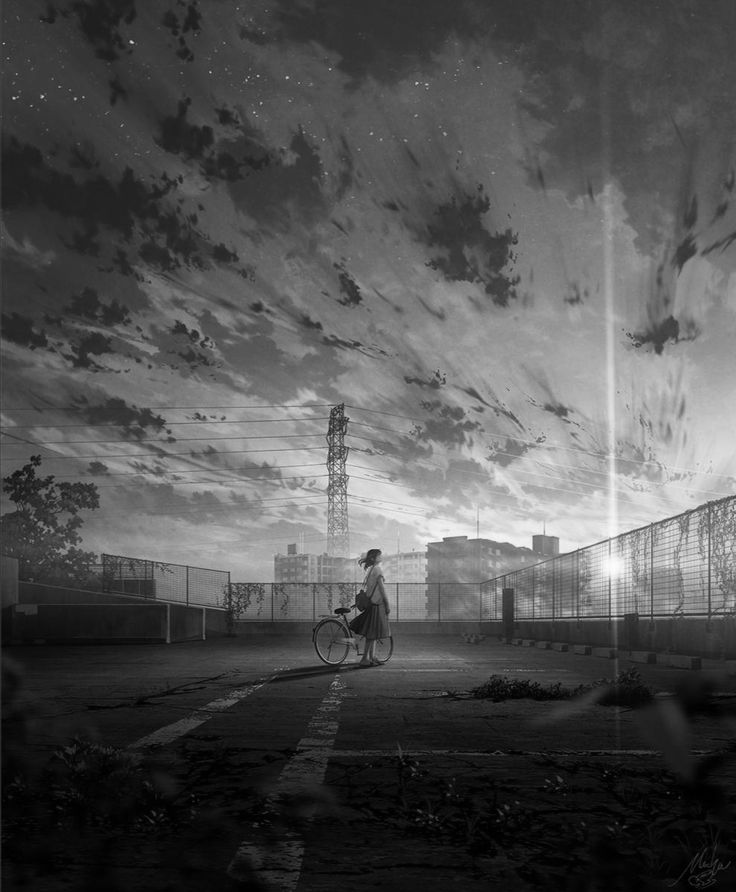

In [33]:
# read gray image
img_gray = cv2.imread("pic03.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_gray)

In [37]:
img_gray.shape

(892, 736)

In [34]:
height,width = len(img_gray),len(img_gray[0])
height,width

(892, 736)

**Method: **
Conver 1 chanel to 3 chanel: arcoding: gray_pixel = 0.299*R-0.587*G-0.114*B

> R = min(255,gray_pixel/0.299)

> G = min(255,gray_pixel/0.587)

> B = min(255,gray_pixel/0.114)

In [47]:
# initial value and array
img_makecolor = [[[0, 0, 0]]*width for i in range(height)]

In [49]:
# calculate value of gray cell:
for i in range(height):
  for j in range(width):
    img_makecolor[i][j] = [min(img_gray[i][j]/0.299,255),min(img_gray[i][j]/0.587,255),min(img_gray[i][j]/0.114,255)]

# convert to numpy array
img_makecolor = np.array(img_makecolor)
img_makecolor.shape

(892, 736, 3)

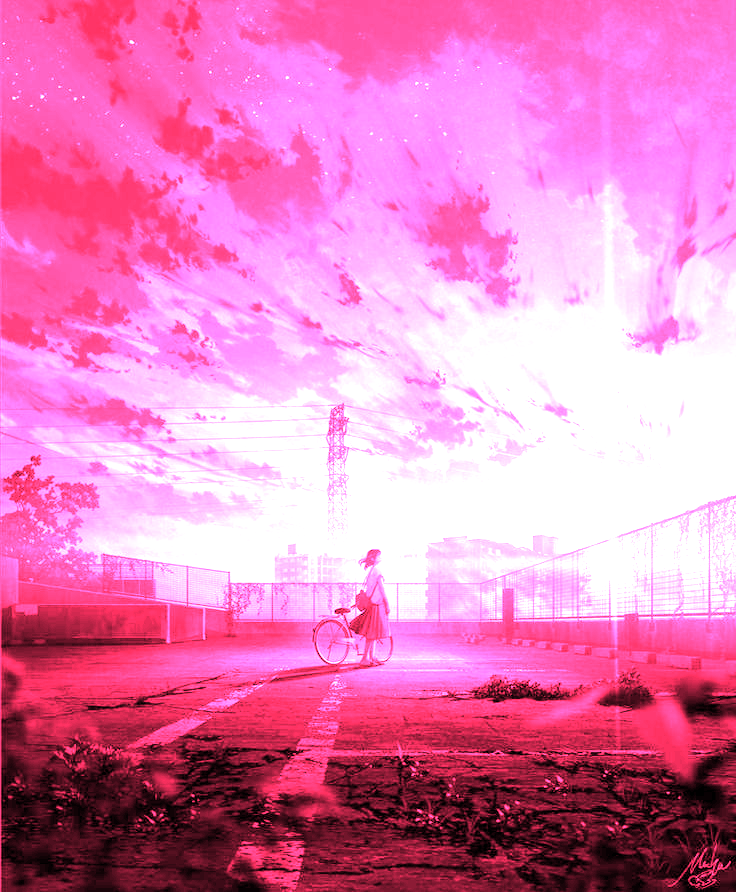

True

In [ ]:
# show grayscale_C1:
cv2_imshow(img_makecolor)
cv2.imwrite("/content/pic_make_color.jpg",img_makecolor)

**NHẬN XÉT:**

Bản chất ảnh xám đã bị mất thông tin khi gộp 3 channel (R,G,B) về thành 1 channel duy nhất; ví dụ các điểm ảnh màu (R,G,B) khác nhau như (50,50,50), (0,50,100), (150,0,0) nếu sử dụng grayscale là "1/3 R-1/3 G-1/3 B" thì sẽ cùng đưa về chung 1 điểm ảnh xám là (50,50,50).

Do đó không thể khôi phục lại màu bằng phương pháp xử lý tạo 3 bảng channel màu từ một channel màu đơn thuần dựa trên grayscale, việc áp dụng phương pháp trên đơn giản có ý nghĩa như áp một filter màu lên tất cả điểm ảnh của ảnh xám.